In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
file_path= "/content/housing.csv"

In [3]:
data= pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Missing Data Analysis

In [8]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values/ len(data))*100

print("Missing Values in Each Column:\n", missing_values)
print("\n Percentage of Missing Data:\n", missing_percentage)


Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [9]:
data_cleaned = data.dropna()
print("\n Missing Data Values in each column after removal: ")
print(data_cleaned.isnull().sum())


 Missing Data Values in each column after removal: 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


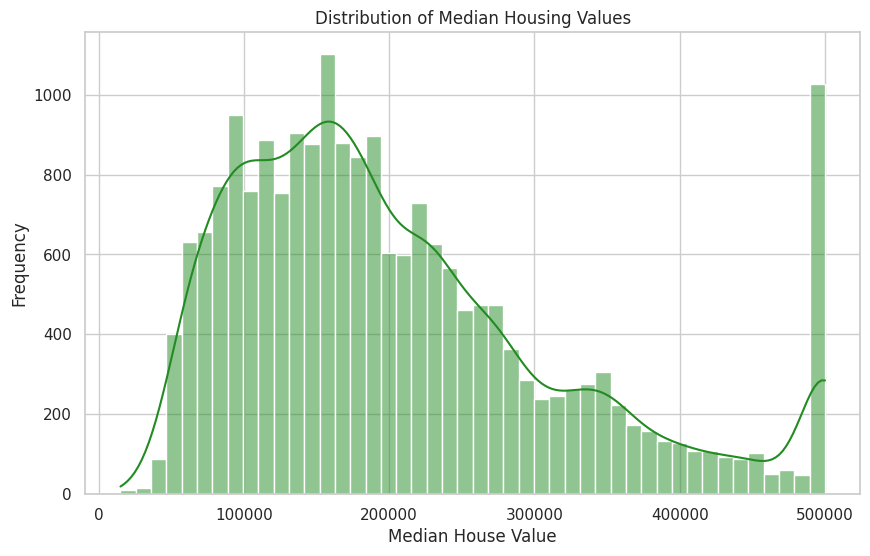

In [11]:
sns.set(style= "whitegrid")
plt.figure (figsize= (10,6))
sns.histplot(data_cleaned['median_house_value'], color = 'forestgreen', kde= True)
plt.title("Distribution of Median Housing Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

In [12]:
Q1 = data_cleaned['median_house_value'].quantile(.25)
Q3= data_cleaned['median_house_value'].quantile(.75)
IQR= Q3 -Q1
lower_bound= Q1- 1.5*IQR
upper_bound= Q3 + 1.5*IQR

data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value']<= upper_bound)]
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


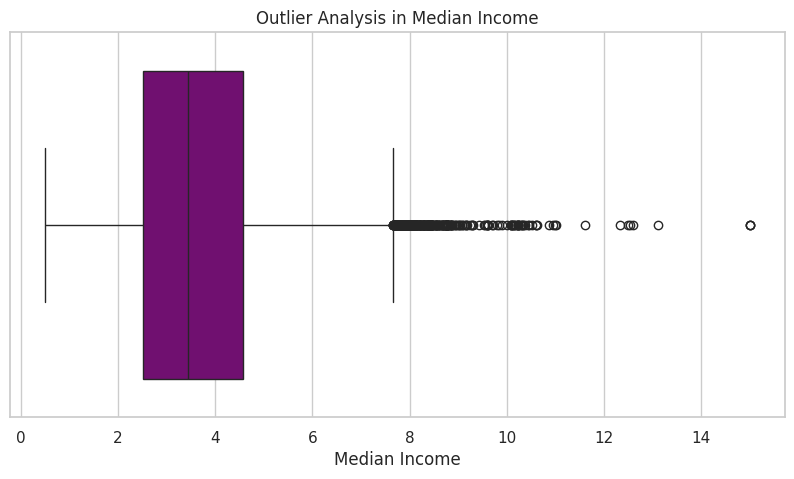

In [13]:
plt.figure(figsize= (10,5))
sns.boxplot(x=data_no_outliers_1['median_income'], color= "purple")
plt.title("Outlier Analysis in Median Income")
plt.xlabel('Median Income')
plt.show()

In [14]:
Q1= data_no_outliers_1['median_income'].quantile(.25)
Q3= data_no_outliers_1['median_income'].quantile(.75)
IQR= Q3 - Q1
lower_bound= Q1- 1.5*IQR
upper_bound= Q3 + 1.5*IQR

data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income']<= upper_bound)]
print("Original data shape:", data_no_outliers_1.shape)
print("New data shape without outliers:", data_no_outliers_2.shape)


Original data shape: (19369, 10)
New data shape without outliers: (19026, 10)


In [15]:
data= data_no_outliers_2

In [16]:
makeshift_data= data.drop('ocean_proximity', axis= 1)

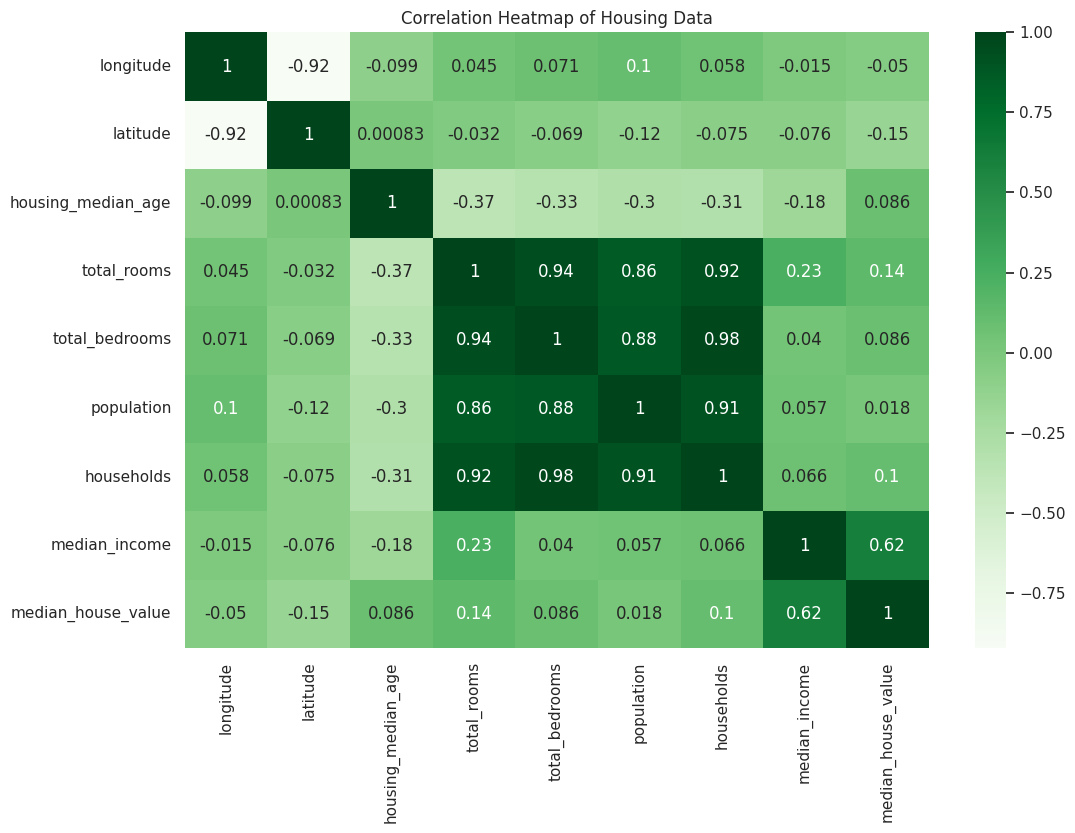

In [17]:
plt.figure(figsize= (12, 8))
sns.heatmap(makeshift_data.corr(), annot= True, cmap= "Greens")
plt.title("Correlation Heatmap of Housing Data")
plt.show()

In [18]:
data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [19]:
data= data.drop("total_bedrooms",axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [20]:
for column in ['ocean_proximity']:
  print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [21]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'],prefix='ocean_proximity')
data= pd.concat([data.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [22]:
data.replace(False,0,inplace= True)
data.replace(True, 1, inplace= True)
data.reset_index(drop=True)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
1,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
2,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
3,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
4,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19021,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
19022,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
19023,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
19024,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [23]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [24]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target= ['median_house_value']

X= data[features]
Y= data[target]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=.2, random_state=1111)

print(f'Training set size:  {X_train.shape[0]} samples')
print(f'Test set size:  {X_test.shape[0]} samples')

Training set size:  15220 samples
Test set size:  3806 samples


Training Data Set


In [25]:
X_train_const= sm.add_constant(X_train)

model_fitted= sm.OLS(Y_train, X_train_const).fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        21:36:58   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [26]:
X_test_const= sm.add_constant(X_test)

test_predictions = model_fitted.predict(X_test_const)

test_predictions

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

Checking OLS assumptions


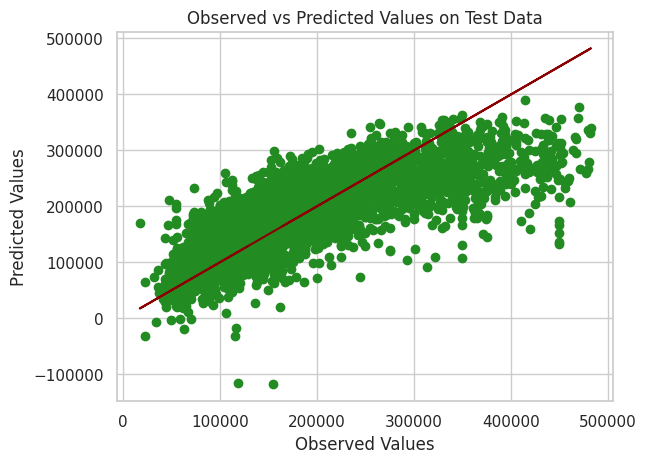

In [27]:
plt.scatter(Y_test, test_predictions, color= "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(Y_test,Y_test, color= "darkred")
plt.show()

In [28]:
mean_residuals= np.mean(model_fitted.resid)
print(f'The mean of the residuals is  {np.round(mean_residuals,2)}')

The mean of the residuals is  0.0


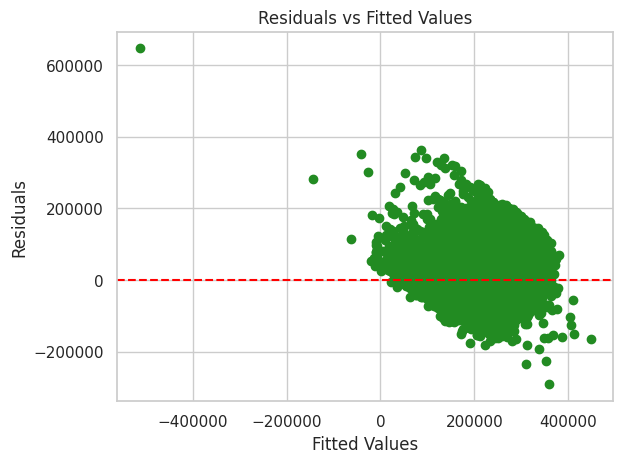

In [29]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color= "forestgreen")
plt.axhline(y=0, color="red", linestyle= '--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title('Residuals vs Fitted Values')
plt.show()

In [30]:
residuals= model_fitted.resid

for column in X_train.columns:
  corr_coefficient= np.corrcoef(X_train[column], residuals)[0,1]
  print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


Homoscedasticity isn't satisfied


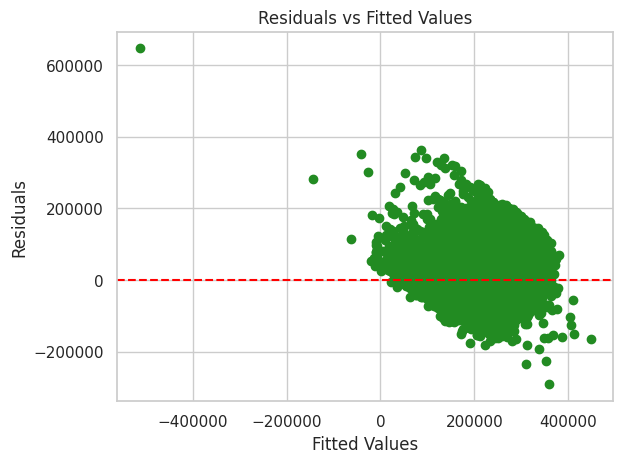

In [31]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color= "forestgreen")
plt.axhline(y=0, color="red", linestyle= '--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title('Residuals vs Fitted Values')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

lr= LinearRegression()
lr.fit(X_train_scaled,Y_train)

Y_pred= lr.predict(X_test_scaled)

mse= mean_squared_error(Y_test, Y_pred)
rmse= sqrt(mse)

print(f'RMSE on Test set: {rmse}')

RMSE on Test set: 59405.88869441674
